In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

m,n=3,4
c=np.zeros((m*n,1))
c[0,0]=12
c[1,0]=13
c[2,0]=4
c[3,0]=6
c[4,0]=6
c[5,0]=4
c[6,0]=10
c[7,0]=11
c[8,0]=10
c[9,0]=9
c[10,0]=12
c[11,0]=4
print(c)
A=np.vstack((np.ones((1,n)),np.zeros((2,n)),np.identity(n)))
A=np.hstack((A,np.vstack((np.zeros((1,n)),np.ones((1,n)),np.zeros((1,n)),np.identity(n)))))
A=np.hstack((A,np.vstack((np.zeros((2,n)),np.ones((1,n)),np.identity(n)))))
print(A)
b=np.zeros((m+n,1))
b[0,0]=500
b[1,0]=700
b[2,0]=800
b[3,0]=400
b[4,0]=900
b[5,0]=200
b[6,0]=500
print(b)

def determineStepSizeUB(d,x,gamma,UB=1):
    alphaUB=float("inf")
    n=len(x)
    for i in range(n):
        if d[i,0]<0:
            if alphaUB>-(gamma *x[i,0])/d[i,0]:
                alphaUB=-(gamma *x[i,0])/d[i,0]
    if alphaUB >UB:
        alphaUB=UB
    return alphaUB

def vector2Matrix(barx,n):
    barX=np.zeros((n,n))
    for i in range(n):
        barX[i,i]=barx[i,0]
    return barX	

def functionValue(alpha,t):
    n=len(alpha)
    i,y,tn=0,0,1
    for coef in alpha:
        y=y+coef*tn
        tn=tn*t
    return y
#m,n=4+3,4*3
A=A[0:6,:]
b=b[0:6,:]
m,n=4+3-1,4*3

barx=np.ones((n,1))
bary=np.ones((m,1))
bars=np.ones((n,1))
#bars[0,0]=1
#bars[1,0]=1
#bars[2,0]=1
#bars[3,0]=1


#print(r2)
e=np.ones((n,1))
mu=100
r1=b-A.dot(barx)
r2=c-A.transpose().dot(bary)-bars
barX=vector2Matrix(barx,n)
barS=vector2Matrix(bars,n)
#barX=np.zeros((n,n))
#barX[0,0]=barx[0,0]
#barX[1,1]=barx[1,0]
#barX[2,2]=barx[2,0]
#barX[3,3]=barx[3,0]
#for i in range(n):
#    barX[i,i]=barx[i,0]
#    #print(barX)
#barS=np.zeros((n,n))
#for i in range(n):
#    barS[i,i]=bars[i,0]
r3=mu*e-barX.dot(barS).dot(e)
r=np.vstack((r1,r2,r3))

iteration=0
while iteration<=100 and np.linalg.norm(r)>1e-6:
    print(iteration)
    barA=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    barA=np.vstack((barA,np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))))
    barA=np.vstack((barA,np.hstack((barS,np.zeros((n,m)),barX))))
    DeltaX=np.linalg.inv(barA).dot(r)
    #print(DeltaX)
    Deltax=DeltaX[0:n,:]
    #print(Deltax)
    Deltay=DeltaX[n:n+m,:]
    Deltas=DeltaX[n+m:2*n+m,:]
    #print(Deltay)
    #print(Deltas)
    alphax=0.01

    gamma=0.9
    alphax=determineStepSizeUB(Deltax,barx,gamma)
    #print(alphax)
    alphay=0.01
    alphay=determineStepSizeUB(Deltas,bars,gamma)
    #print(alphay)

    newx=barx+alphax*Deltax
    newy=bary+alphay*Deltay
    news=bars+alphay*Deltas#note alphay
    ###############################################
    barx=newx
    bary=newy
    bars=news
    print(np.linalg.norm(r))
    mu=barx.transpose().dot(bars)/(10*n)
    
    iteration=iteration+1
    
    r1=b-A.dot(barx)
    r2=c-A.transpose().dot(bary)-bars
    barX=vector2Matrix(barx,n)
    barS=vector2Matrix(bars,n)
    r3=mu*e-barX.dot(barS).dot(e)
    r=np.vstack((r1,r2,r3))
print(barx)

[[12.]
 [13.]
 [ 4.]
 [ 6.]
 [ 6.]
 [ 4.]
 [10.]
 [11.]
 [10.]
 [ 9.]
 [12.]
 [ 4.]]
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]
[[500.]
 [700.]
 [800.]
 [400.]
 [900.]
 [200.]
 [500.]]
0
1575.815661808195
1
308.46008681069424
2
233.80369031852445
3
191.98092892284598
4
116.88388215747194
5
23.934012265705107
6
3.2718970947718633
7
0.40011295297850574
8
0.0452973226570056
9
0.00494356671387452
10
0.0005210555436230432
11
5.373734800967806e-05
12
5.471293791021504e-06
[[1.34718624e+02]
 [8.99704056e-08]
 [2.00000000e+02]
 [1.65281376e+02]
 [1.79940774e-07]
 [7.00000000e+02]
 [1.38415949e-08]
 [1.49950613e-08]
 [2.65281376e+02]
 [2.00000000e+02]
 [1.79940735e-08]
 [3.34718624e+02]]


In [2]:
import random
random.seed(10)
print(random.random())
x=[]
label=[]
for i in range(5):
    x.append([10*random.random(),10*random.random()])
    print(x[i][0]-x[i][1]+5,x[i][0]-x[i][1]-5)
    if x[i][0]-x[i][1]+5<=0:
        label.append(1)
    else:
        if x[i][0]-x[i][1]-5>=0:
            label.append(-1)
        else:
            label.append(0)
print(x)
print(label)

0.5714025946899135
3.507977535406442 -6.492022464593558
-1.072230192178183 -11.072230192178182
6.701163386322698 -3.2988366136773024
1.3956019687889505 -8.60439803121105
5.777761349356927 -4.222238650643073
[[4.288890546751146, 5.780913011344704], [2.0609823213950174, 8.1332125135732], [8.235888725334455, 6.534725339011757], [1.6022955651881965, 5.206693596399246], [3.2777281162209313, 2.4999667668640035]]
[0, 1, 0, 0, 0]


In [3]:
import random
random.seed(10)
print(random.random())
x=[]
label=[]
for i in range(5):
    x0=10*random.random()
    x1=10*random.random()
    if x0-x1+5<=0:
        label.append(1)
        x.append([x0,x1])
    else:
        if x0-x1-5>=0:
            label.append(-1)
            x.append([x0,x1])
print(x)
print(label)

0.5714025946899135
[[2.0609823213950174, 8.1332125135732]]
[1]


In [4]:
import random
random.seed(10)
print(random.random())
x=[]
label=[]
i=0
while i<50 and len(x)<5:    
    x0=10*random.random()
    x1=10*random.random()
    if x0-x1+5<=0:
        label.append(1)
        x.append([x0,x1])
    else:
        if x0-x1-5>=0:
            label.append(-1)
            x.append([x0,x1])
    i=i+1
print(x)
print(label)

0.5714025946899135
[[2.0609823213950174, 8.1332125135732], [0.4455638245043303, 8.60161037286291], [6.618463200523511, 1.329781447122128], [1.3397252704913387, 9.410022713958341], [8.981962445391883, 3.1436380495645064]]
[1, 1, -1, 1, -1]


In [5]:
x_1=[]
x_2=[]
for i in range(len(label)):
    if label[i]==1:
        x_1.append(x[i])
    if label[i]==-1:
        x_2.append(x[i])
print(x_1)
print(x_2)
    

[[2.0609823213950174, 8.1332125135732], [0.4455638245043303, 8.60161037286291], [1.3397252704913387, 9.410022713958341]]
[[6.618463200523511, 1.329781447122128], [8.981962445391883, 3.1436380495645064]]


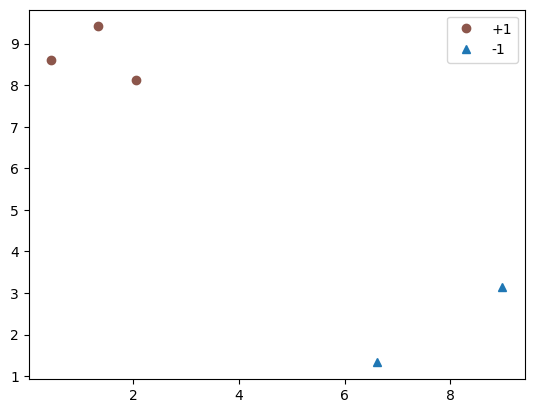

In [12]:
fig,ax = plt.subplots()
line1 = ax.plot([x[0] for x in x_1],[x[1] for x in x_1], "o", color="tab:brown", label="+1")
line2 = ax.plot([x[0] for x in x_2],[x[1] for x in x_2], "^", color="tab:blue", label="-1")
#line2 = ax.plot(samplePoints, [functionValue(a,x)[0] for x in samplePoints], label="Points from 11-regression")
ax. legend()
plt. show()

In [14]:
A=np.zeros((1,7))
A[0,0]=x_1[0][0]
A[0,1]=-x_1[0][0]
A[0,2]=x_1[0][1]
A[0,3]=-x_1[0][1]
A[0,4]=1
A[0,5]=-1
A[0,6]=-1
print(A)

[[ 2.06098232 -2.06098232  8.13321251 -8.13321251  1.         -1.
  -1.        ]]


In [21]:
A=np.zeros((5,6+5))
A[0,0]=x_1[0][0]
A[0,1]=-x_1[0][0]
A[0,2]=x_1[0][1]
A[0,3]=-x_1[0][1]
A[0,4]=1
A[0,5]=-1
A[0,6]=-1
print(A)
A[1,0]=x_1[1][0]
A[1,1]=-x_1[1][0]
A[1,2]=x_1[1][1]
A[1,3]=-x_1[1][1]
A[1,4]=1
A[1,5]=-1
A[1,6+1]=-1
print(A)
i=2
A[i,0]=x_1[i][0]
A[i,1]=-x_1[i][0]
A[i,2]=x_1[i][1]
A[i,3]=-x_1[i][1]
A[i,4]=1
A[i,5]=-1
A[i,6+i]=-1
print(A)
i=3
j=0
A[i+j,0]=x_2[j][0]
A[i+j,1]=-x_2[j][0]
A[i+j,2]=x_2[j][1]
A[i+j,3]=-x_2[j][1]
A[i+j,4]=1
A[i+j,5]=-1
A[i+j,6+i+j]=1
print(A)

j=1
A[i+j,0]=x_2[j][0]
A[i+j,1]=-x_2[j][0]
A[i+j,2]=x_2[j][1]
A[i+j,3]=-x_2[j][1]
A[i+j,4]=1
A[i+j,5]=-1
A[i+j,6+i+j]=1
print(A)

[[ 2.06098232 -2.06098232  8.13321251 -8.13321251  1.         -1.
  -1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[[ 2.06098232 -2.06098232  8.13321251 -8.13321251  1.         -1.
  -1.          0.          0.          0.          0.        ]
 [ 0.44556382 -0.44556382  8.60161037 -8.60161037  1.         -1.
   0.         -1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0. 

In [24]:
nz=np.zeros
p=print
b=nz((5,1))
b[0,0]=1
b[1,0]=1
b[2,0]=1
b[3,0]=-1
b[4,0]=-1
p(b)
b=np.vstack((np.ones((3,1)),-np.ones((2,1))))
p(b)

[[ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]]
[[ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]]


In [26]:
c=nz((6+5,1))
barw1=1
barw2=1
c[0,0]=barw1
c[1,0]=-barw1
c[2,0]=barw2
c[3,0]=-barw2
p(c)

[[ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Input A、B、C

m=len(A)
n=len(A[0,:])

def determineStepSizeUB(d,x,gamma,UB=1):
    alphaUB=float("inf")
    n=len(x)
    for i in range(n):
        if d[i,0]<0:
            if alphaUB>-(gamma *x[i,0])/d[i,0]:
                alphaUB=-(gamma *x[i,0])/d[i,0]
    if alphaUB >UB:
        alphaUB=UB
    return alphaUB

def vector2Matrix(barx,n):
    barX=np.zeros((n,n))
    for i in range(n):
        barX[i,i]=barx[i,0]
    return barX	

def functionValue(alpha,t):
    n=len(alpha)
    i,y,tn=0,0,1
    for coef in alpha:
        y=y+coef*tn
        tn=tn*t
    return y
#m,n=4+3,4*3
#A=A[0:6,:]
#b=b[0:6,:]
#m,n=4+3-1,4*3

barx=np.ones((n,1))
bary=np.ones((m,1))
bars=np.ones((n,1))



c=nz((6+5,1))
barw1=barx[0,0]-barx[1,0]
barw2=barx[2,0]-barx[3,0]
c[0,0]=barw1
c[1,0]=-barw1
c[2,0]=barw2
c[3,0]=-barw2
p(c)




#bars[0,0]=1
#bars[1,0]=1
#bars[2,0]=1
#bars[3,0]=1


#print(r2)
e=np.ones((n,1))
mu=100
r1=b-A.dot(barx)
r2=c-A.transpose().dot(bary)-bars
barX=vector2Matrix(barx,n)
barS=vector2Matrix(bars,n)
#barX=np.zeros((n,n))
#barX[0,0]=barx[0,0]
#barX[1,1]=barx[1,0]
#barX[2,2]=barx[2,0]
#barX[3,3]=barx[3,0]
#for i in range(n):
#    barX[i,i]=barx[i,0]
#    #print(barX)
#barS=np.zeros((n,n))
#for i in range(n):
#    barS[i,i]=bars[i,0]
r3=mu*e-barX.dot(barS).dot(e)
r=np.vstack((r1,r2,r3))

iteration=0
while iteration<=100 and np.linalg.norm(r)>1e-6:
    print(iteration)
    barA=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    barA=np.vstack((barA,np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))))
    barA=np.vstack((barA,np.hstack((barS,np.zeros((n,m)),barX))))
    DeltaX=np.linalg.inv(barA).dot(r)
    #print(DeltaX)
    Deltax=DeltaX[0:n,:]
    #print(Deltax)
    Deltay=DeltaX[n:n+m,:]
    Deltas=DeltaX[n+m:2*n+m,:]
    #print(Deltay)
    #print(Deltas)
    alphax=0.01

    gamma=0.9
    alphax=determineStepSizeUB(Deltax,barx,gamma)
    #print(alphax)
    alphay=0.01
    alphay=determineStepSizeUB(Deltas,bars,gamma)
    #print(alphay)

    newx=barx+alphax*Deltax
    newy=bary+alphay*Deltay
    news=bars+alphay*Deltas#note alphay
    ###############################################
    barx=newx
    bary=newy
    bars=news
    print(np.linalg.norm(r))
    mu=barx.transpose().dot(bars)/(10*n)
    
    iteration=iteration+1
    
    r1=b-A.dot(barx)
    r2=c-A.transpose().dot(bary)-bars
    barX=vector2Matrix(barx,n)
    barS=vector2Matrix(bars,n)
    r3=mu*e-barX.dot(barS).dot(e)
    r=np.vstack((r1,r2,r3))
print(barx)

[[ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
0
332.45496592527604
1
342.69443156997784
2
47.62391554252391
3
6.592695244803208
4
0.8185591812576576
5
0.09283397741608314
6
0.010241173682374732
7
0.00112583433354266
8
0.0001237432668793804
9
1.3602443890640019e-05
10
1.495417884238745e-06
[[240.83886377]
 [282.08317754]
 [280.37602744]
 [242.29068127]
 [252.23313726]
 [269.05534075]
 [206.930209  ]
 [291.39613098]
 [285.30571959]
 [238.1509897 ]
 [266.55053756]]
